# Introduction to Data Science and Machine Learning

**University Course**<br/>
**Fall 2020-2021**<br/>
**Instructor**: G. P. Tsironis

**Team** : AdaBoost

<hr style='height:1px'>

## Importing the modules that we will use

In [ ]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import time # to count how much time some cells need to run
import matplotlib as mpl # to draw pretty graphs
import matplotlib.pyplot as plt # to draw pretty graphs
import seaborn as sns # to draw graphs
import warnings # to dicregand some warningsimport warnings
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.preprocessing import MinMaxScaler # to scale our data
from sklearn import tree # to check the number of nodes in the decision trees
from sklearn.svm import LinearSVC # to build a SVM model
from sklearn.tree import DecisionTreeClassifier # to build a decision tree model
from sklearn.ensemble import ExtraTreesClassifier # to build an extra trees model
from sklearn.ensemble import RandomForestClassifier # to build a random forest model
from sklearn.tree import plot_tree # to draw classification trees
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # to build a linear model
from sklearn.preprocessing import PolynomialFeatures # to build a polynomial model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge # to build a ridge linear model
from sklearn.linear_model import Lasso # to build a lasso linear model
from sklearn.linear_model import LogisticRegression # to build a logistic model
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

In [ ]:
warnings.filterwarnings(action="ignore", message = "^internal gelsd") # Ignore useless warnings (see SciPy issue #5998)

np.random.seed(42) # to make this notebook's output stable across runs

# to draw pretty graphs
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

ttt=time.time()

<hr style='height:1px'>

## Importing the data

In [ ]:
## since we have already downloaded the data to the same directory as we run our notebook from,
##  we can load the file : 
#from google.colab import drive
#drive.mount('/content/drive/')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv').copy()
data = pd.read_csv('train.csv').copy()
data.set_index("id", inplace=True)


In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


The data is now loaded in the format that are in the file. The name of each collumn is displayed in the first row. However some of the data types are not easily understood.

* **id** : Unique ID for the customer.
* **Gender** : The gender of the customer.
* **Age** : The age of the customer.
* **Driving_License** : 0 if the customer does not have Driving License, 1 if the customer has Driving License.
* **Region_Code** : Unique code for the region of the customer.
* **Previously_Insured** : 1 if the customer already has Vehicle Insurance, 0 if the customer doesn't have Vehicle Insurance.
* **Vehicle_Age** : Age of the vehicle.
* **Vehicle_Damage** : 1 if the customer has his/her vehicle damaged in the past, 0 if the customer didn't get his/her vehicle damaged in the past.
* **Annual_Premium** : The amount the customer need to pay as a premium in the year.
* **PolicySalesChannel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* **Vintage** : Number of Days the customer has been associated with the company.
* **Response** : 1 if the customer is interested, 0 if the customer is not interested.

<hr style='height:1px'>

<hr style='height:1px'>

## Preparing the dataset 

### - First look of the data

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

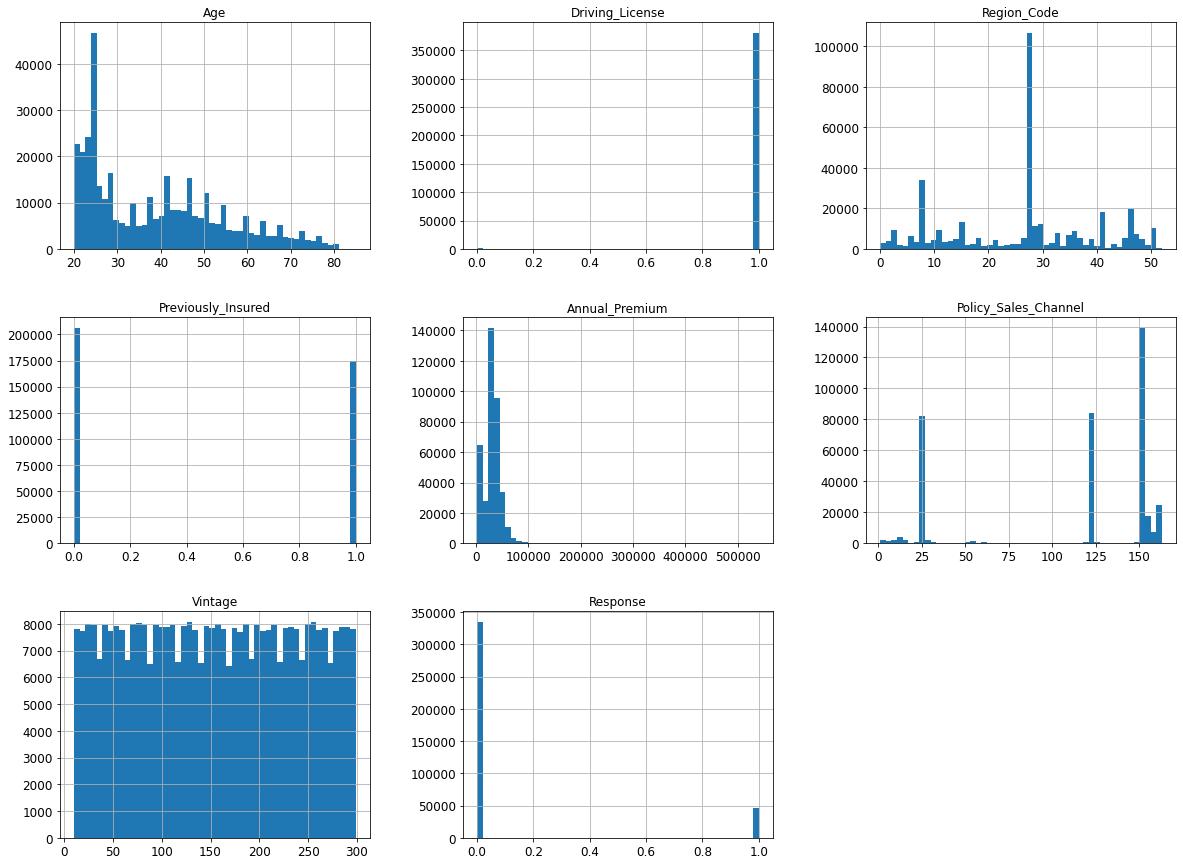

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

We observe that the object types features didn't got printed like the others by  hist command so we will print them separately.

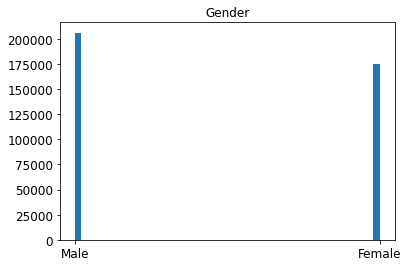

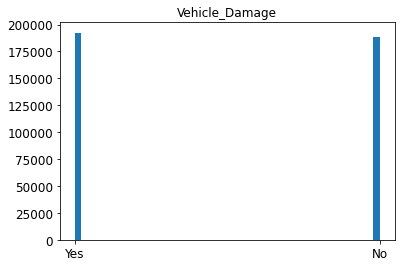

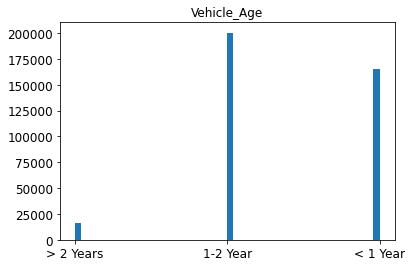

In [ ]:
plt.hist(data['Gender'],bins=50 )
plt.title('Gender')
plt.show()
plt.hist(data['Vehicle_Damage'],bins=50 )
plt.title('Vehicle_Damage')
plt.show()
plt.hist(data['Vehicle_Age'],bins=50 )
plt.title('Vehicle_Age')
plt.show()

We conclude that:
  * There is a great disparity on the size our target values 
  * There are object values that are unsuitable for classification
  * There is a great disparity on the size of the features values

### - First level of preporation

#### -- From object values to numerical

We need to check for missing data in the collumns that are listed as "object". "Object" datatypes are often uses when there is a mixture of things, like a mixture of numbers and letters. We will investigate  what's going on by printing out their unique values.

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
data['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

As we can see, the data is just created in a mixture type and no missing data were detected.

In [ ]:
# Now we are going to convert the columns that their data are words to numeric data, so we can work with the data set.

males = data['Gender'] == 'Male'
females = data['Gender'] == 'Female'
data['Gender'].loc[males]= 1
data['Gender'].loc[females]= 0
lessthanone = data['Vehicle_Age'] == '< 1 Year'
oneandtwo = data['Vehicle_Age'] == '1-2 Year'
morethantwo = data['Vehicle_Age'] == '> 2 Years'
data['Vehicle_Age'].loc[lessthanone]= 0.0
data['Vehicle_Age'].loc[oneandtwo]= 0.5
data['Vehicle_Age'].loc[morethantwo]= 1.0
yes = data['Vehicle_Damage'] == 'Yes'
no = data['Vehicle_Damage'] == 'No'
data['Vehicle_Damage'].loc[yes]= 1
data['Vehicle_Damage'].loc[no]= 0

C:\Users\metallas\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
for col in data.columns:
    data[col] = data[col].astype(np.float)

In [ ]:
data.dtypes

Gender                  float64
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age             float64
Vehicle_Damage          float64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                float64
dtype: object

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1.0,44.0,1.0,28.0,0.0,1.0,1.0,40454.0,26.0,217.0,1.0
2,1.0,76.0,1.0,3.0,0.0,0.5,0.0,33536.0,26.0,183.0,0.0
3,1.0,47.0,1.0,28.0,0.0,1.0,1.0,38294.0,26.0,27.0,1.0
4,1.0,21.0,1.0,11.0,1.0,0.0,0.0,28619.0,152.0,203.0,0.0
5,0.0,29.0,1.0,41.0,1.0,0.0,0.0,27496.0,152.0,39.0,0.0


No more object values

#### -- Scaling the data

In [ ]:
scaling = MinMaxScaler()
data["Age"] = scaling.fit_transform(data[["Age"]])
data["Annual_Premium"] = scaling.fit_transform(data[["Annual_Premium"]])
data["Policy_Sales_Channel"] = scaling.fit_transform(data[["Policy_Sales_Channel"]])
data["Vintage"] = scaling.fit_transform(data[["Vintage"]])
data["Region_Code"] = scaling.fit_transform(data[["Region_Code"]])

#### -- Leveling the target values

In [ ]:
_,counts = np.unique(data['Response'], return_counts = True)
_,counts

(array([0., 1.]), array([334399,  46710], dtype=int64))

In [ ]:
len(data)

381109

In [ ]:
import random
ran = random.sample(range(1,381109-1),381000)

i=1
a=[]
while len(a) < (334399-46710) :
  if data['Response'].iloc[ran[i]-1] == 0:
    #print(data['Response'].iloc[i])
    a.append(ran[i])
    #data = data.drop(i)
  i = i + 1
data = data.drop(a)

In [ ]:
_,counts = np.unique(data['Response'], return_counts = True)
_,counts

(array([0., 1.]), array([46710, 46710], dtype=int64))

In [ ]:
len(data)

93420

Now the "Response" column is leveled and the number of possitive negatice instances is equal for our data set to work with.

### - Second look of the data

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.070366,0.154321,0.716263,1.0
3,1.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.066347,0.154321,0.058824,1.0
8,0.0,0.553846,1.0,0.538462,0.0,0.5,1.0,0.054696,0.154321,0.214533,1.0
11,0.0,0.415385,1.0,0.673077,0.0,0.5,1.0,0.083615,0.759259,0.124567,1.0
14,1.0,0.861538,1.0,0.538462,0.0,0.5,1.0,0.063512,0.074074,0.017301,0.0


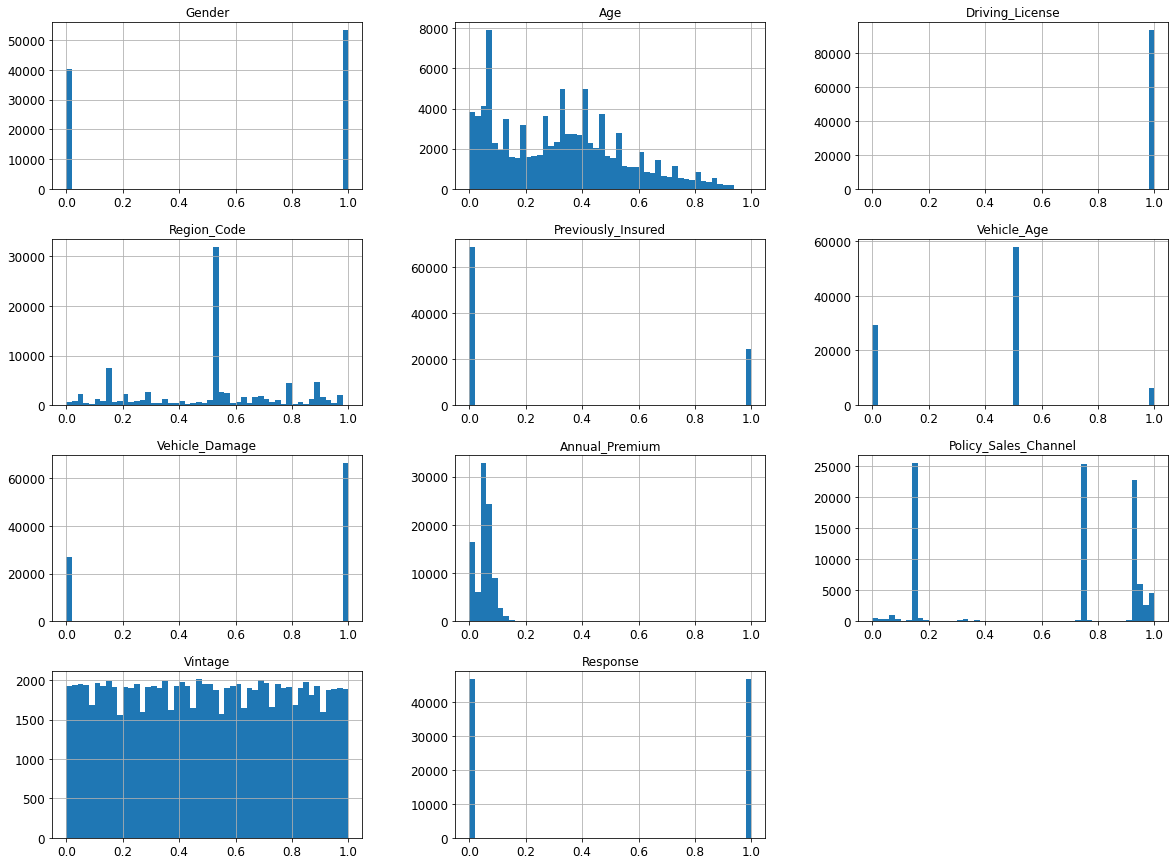

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Lets take a look of the distribution seperetly for the  target values to get insights

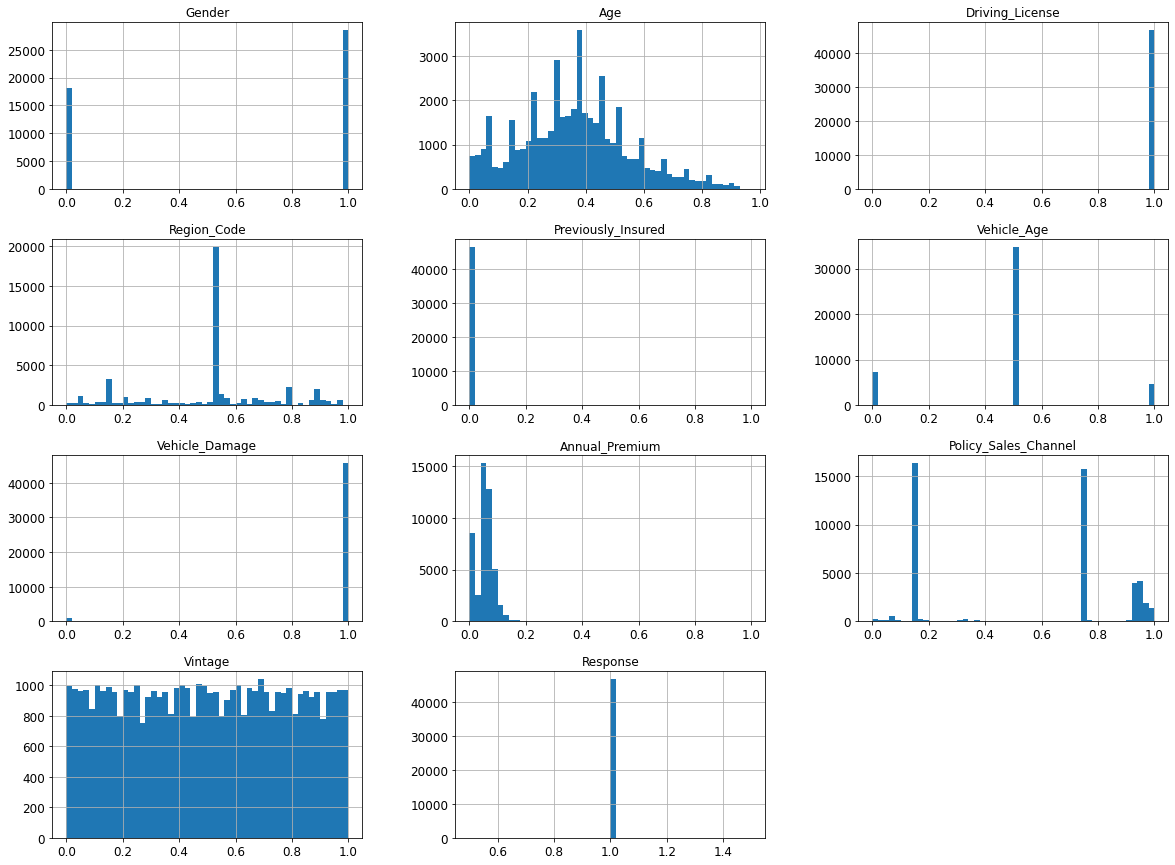

In [ ]:
data.loc[data["Response"]==1].hist(bins=50, figsize=(20,15))
plt.show()

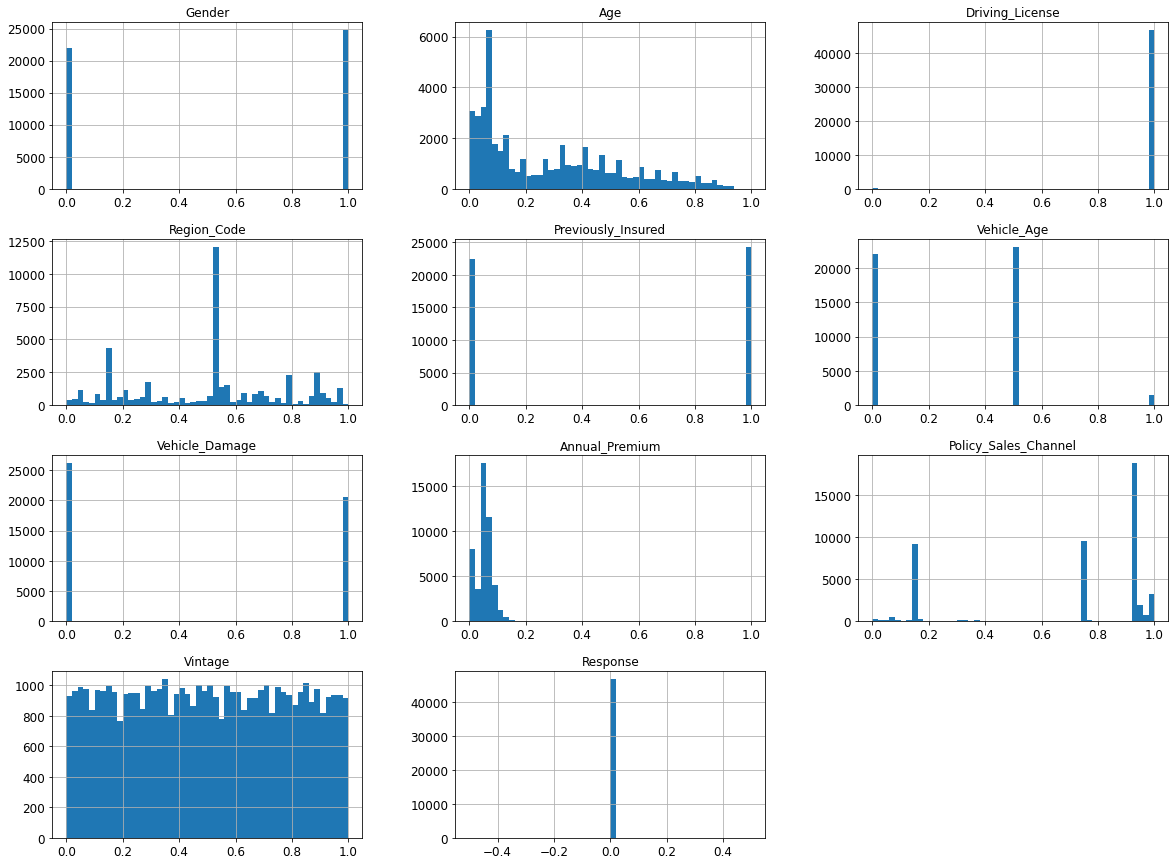

In [ ]:
data.loc[data["Response"]==0].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
for col in data.columns:
    print([ col,abs( np.corrcoef(data[col],data['Response']))[1][0]])

['Gender', 0.08226920540475888]
['Age', 0.1840314551012849]
['Driving_License', 0.017130653055715348]
['Region_Code', 0.01775817630144603]
['Previously_Insured', 0.5879710147046263]
['Vehicle_Age', 0.34078858462258976]
['Vehicle_Damage', 0.5939720891425156]
['Annual_Premium', 0.037193685980729696]
['Policy_Sales_Channel', 0.2069062054775659]
['Vintage', 0.0003128824016670514]
['Response', 1.0]


We conclude that because of the low correlation score the columns Region_Code,Annual_Premium,Vintage,Gender,Driving_License can be dropped.Keeping them will make our code more computive intensive without improving much our accuracy score

### - Second level of preporation

#### -- Dropping

In [ ]:
features = ["Region_Code","Annual_Premium","Vintage","Gender",'Driving_License']
for features in features:
      data = data.drop(features,axis=1)
data

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
id,,,,,,
1,0.369231,0.0,1.0,1.0,0.154321,1.0
3,0.415385,0.0,1.0,1.0,0.154321,1.0
8,0.553846,0.0,0.5,1.0,0.154321,1.0
11,0.415385,0.0,0.5,1.0,0.759259,1.0
14,0.861538,0.0,0.5,1.0,0.074074,0.0
...,...,...,...,...,...,...
381087,0.215385,0.0,0.5,1.0,0.932099,0.0
381095,0.415385,0.0,0.5,1.0,0.154321,0.0
381098,0.276923,0.0,0.5,1.0,0.154321,1.0


#### -- Spliting of the data

In [ ]:
X = data.drop('Response',axis=1).copy()
y = data['Response'].copy()

In [ ]:
X.shape

(93420, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(74736, 5) (18684, 5)


<hr style='height:1px'>

## Classifiers

### - Decision Trees

#### -- Building a Preliminary Classification Tree

In [ ]:
## create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
treeObj = clf_dt.tree_
print(treeObj.node_count)

5925


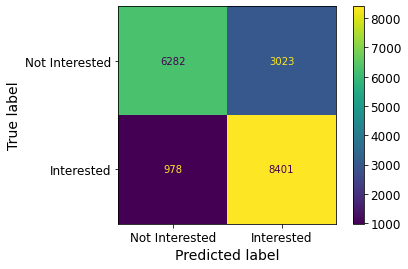

In [ ]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not Interested","Interested"])

We see in the confusion matrix that 978 + 8401 = 9379 people that were Interested, **89.57%** were correctly classified and from the 6282 + 3023 = 9305 that were Not Interested, **67.51%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

#### -- Cost Complexity Pruning

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

len(ccp_alphas)

1701

**We can see we have too many alphas.**

It is really computively expensive to build a decision tree for each one of these alphas and calculate the score for each and every one of them. Instead we are going to break them into section, by only building classification trees for 100 of them.

In [ ]:
a=[]
for i in np.linspace(0,max(ccp_alphas),100):
  a.append(i)

In [ ]:
clf_dts = [] # create an array that we will put decision trees into

## now we create one decision tree per value for alpha and store it in the array
for ccp_alpha in a:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

<function matplotlib.pyplot.show(close=None, block=None)>

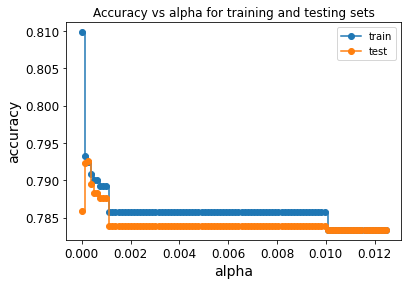

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(a, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show

In [ ]:
Best_index = test_scores.index(max(test_scores))
Best_scores = []
HP = []
Best_scores.append(["Decision trees", test_scores[Best_index]*100])
HP.append(a[Best_index])
print("The Decision trees model with the best accuracy (Accuracy = ", test_scores[Best_index],") with a = ",a[Best_index],"as hyperparameter")

The Decision trees model with the best accuracy (Accuracy =  0.792603296938557 ) with a =  0.00025179982661079867 as hyperparameter


### - Random Forest Classifier

In [ ]:
score = []

for n in range(10):
    random_forest_clf = RandomForestClassifier(n_estimators=(n*50+1), random_state=42)
    random_forest_clf.fit(X_train, y_train)
    score.append(random_forest_clf.score(X_test, y_test))

In [ ]:
n=[]
for i in range(len(score)):
    n.append(i*50+1)
Best_index = score.index(max(score))
Best_scores.append(["Random Forest",score[Best_index]*100])
HP.append(n[Best_index])
print("The Random Forest model with the best accuracy (Accuracy = ", score[Best_index],") with n = ",n[Best_index],"as number of estimators")

The Random Forest model with the best accuracy (Accuracy =  0.7896060800685079 ) with n =  151 as number of estimators


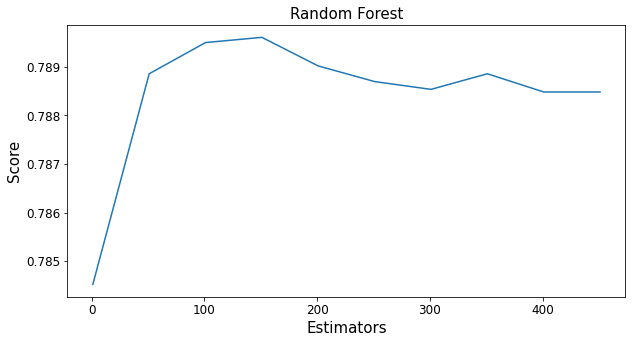

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n,score)
plt.title("Random Forest", fontsize=15)
plt.xlabel("Estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

### - Extra Trees

In [ ]:
score = []

for n in range(10):

    extra_trees_clf = ExtraTreesClassifier(n_estimators=(n*50+1), random_state=42)
    extra_trees_clf.fit(X_train, y_train)
    score.append(extra_trees_clf.score(X_test, y_test))

In [ ]:
n=[]
for i in range(len(score)):
    n.append(i*50+1)
Best_index = score.index(max(score))
Best_scores.append(["Extra Trees",score[Best_index]*100])
HP.append(n[Best_index])
print("The Extra Trees model with the best accuracy (Accuracy = ", score[Best_index],") with n = ",n[Best_index],"as number of estimators")

The Extra Trees model with the best accuracy (Accuracy =  0.7872511239563262 ) with n =  51 as number of estimators


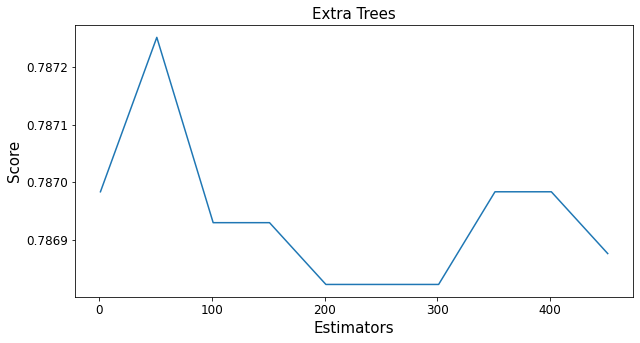

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n,score)
plt.title("Extra Trees", fontsize=15)
plt.xlabel("Estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

### - SVM

In [ ]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)
Best_scores.append(["SVM Classifier",svm_clf.score(X_test, y_test)*100])
print(svm_clf.score(X_test, y_test)*100)

78.33440376792979


<hr style='height:1px'>

### - Logistic Regression

Simple Logistic Regression accuracy:  78.32369942196532 %


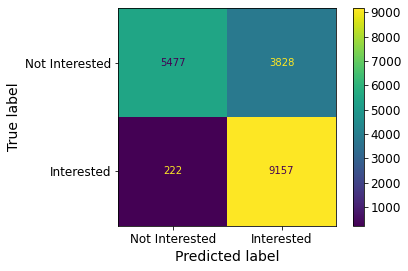

In [ ]:
log_reg = LogisticRegression( random_state=42)
log_clf = log_reg.fit(X_train, y_train)
logpreds = log_reg.predict(X_test)
print('Simple Logistic Regression accuracy: ', accuracy_score(y_test, logpreds)*100,'%')
Best_scores.append(["Logistic Regression",accuracy_score(y_test, logpreds)*100])

plot_confusion_matrix(log_clf, X_test, y_test, display_labels=["Not Interested","Interested"])

We see in the confusion matrix that 222 + 9157 = 9379 people that were Interested, **97.63%** were correctly classified and from the 5477 + 3828 = 9305 that were Not Interested, **58.86%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

## Regressions

### - Ridge and Lasso

In [ ]:
def regression(model_class, polynomial, alphas, **model_kargs):
        model = model_class(alphas, **model_kargs) if alphas > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X_train.to_numpy(), y_train)
        regul = model.predict(X_test)
        lw = 2 if alphas > 0 else 1
        return regul.round()

#### -- Ridge

Ridge Regression accuracy:  78.33440376792979 %


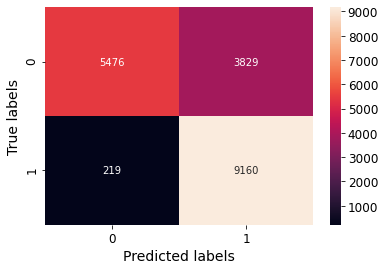

In [ ]:
rin_reg = regression(Ridge, polynomial = False, alphas = 1 , random_state = 42)
print('Ridge Regression accuracy: ', (accuracy_score(y_test, rin_reg, normalize=False)/len(y_test))*100,"%")
Best_scores.append(["Ridge Regression",(accuracy_score(y_test, rin_reg, normalize=False)/len(y_test))*100])

def plot_confusionmatrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plot_confusionmatrix(y_test, rin_reg)

We see in the confusion matrix that 219 + 9160 = 9379 people that were Interested, **97.66%** were correctly classified and from the 5476 + 3829 = 9305 that were Not Interested, **58.85%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

#### -- Lasso

Lasso Regression accuracy:  76.93213444658531 %


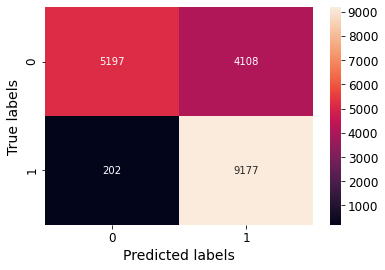

In [ ]:
Lasso_reg = regression(Lasso, polynomial = False, alphas = 0.1 , random_state = 42)
print('Lasso Regression accuracy: ', (accuracy_score(y_test, Lasso_reg, normalize=False)/len(y_test))*100,"%")
Best_scores.append(["Lasso Regression",(accuracy_score(y_test, Lasso_reg, normalize=False)/len(y_test))*100])

plot_confusionmatrix(y_test, Lasso_reg)

We see in the confusion matrix that 202 + 9177 = 9379 people that were Interested, **97.85%** were correctly classified and from the 5197 + 4108 = 9305 that were Not Interested, **55.41%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

<hr style='height:1px'>

## Voting Classifiers

In [ ]:
Best_scores

[['Decision trees', 79.26032969385571],
 ['Random Forest', 78.96060800685079],
 ['Extra Trees', 78.72511239563262],
 ['SVM Classifier', 78.33440376792979],
 ['Logistic Regression', 78.32369942196532],
 ['Ridge Regression', 78.33440376792979],
 ['Lasso Regression', 76.93213444658531]]

We will include the best 3 models to see if we can improve them

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=HP[1], random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=HP[2], random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=HP[0])

In [ ]:
estimators = [random_forest_clf, extra_trees_clf,clf_dt]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(n_estimators=151, random_state=42)
Training the ExtraTreesClassifier(n_estimators=51, random_state=42)
Training the DecisionTreeClassifier(ccp_alpha=0.00025179982661079867, random_state=42)


### - Combining the classifiers

In [ ]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("clf_dt", clf_dt),
    ("extra_trees_clf",extra_trees_clf),
]

In [ ]:
voting_clf_full = VotingClassifier(named_estimators)
voting_clf_noRF = VotingClassifier([
    ("clf_dt", clf_dt),
    ("extra_trees_clf",extra_trees_clf),
])

voting_clf_noDT = VotingClassifier([
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf",extra_trees_clf),
])
voting_clf_noET = VotingClassifier([
    ("random_forest_clf", random_forest_clf),
    ("clf_dt", clf_dt),
])

In [ ]:
voting_clf_full.fit(X_train, y_train)
voting_clf_noRF.fit(X_train, y_train)
voting_clf_noDT.fit(X_train, y_train)
voting_clf_noET.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=151,
                                                     random_state=42)),
                             ('clf_dt',
                              DecisionTreeClassifier(ccp_alpha=0.00025179982661079867,
                                                     random_state=42))])

### - Scorring

In [ ]:
Best_scores.append(["Voting with all Classifiers",voting_clf_full.score(X_test, y_test)*100])
Best_scores.append(["Voting without Random Forest Classifier",voting_clf_noRF.score(X_test, y_test)*100])
Best_scores.append(["Voting without Decision Trees Classifier",voting_clf_noDT.score(X_test, y_test)*100])
Best_scores.append(["Voting without Extra Trees Classifier",voting_clf_noET.score(X_test, y_test)*100])

<hr style='height:1px'>

## PCA

### - Investigating the behaviour of PCA with Random Forest Classifier

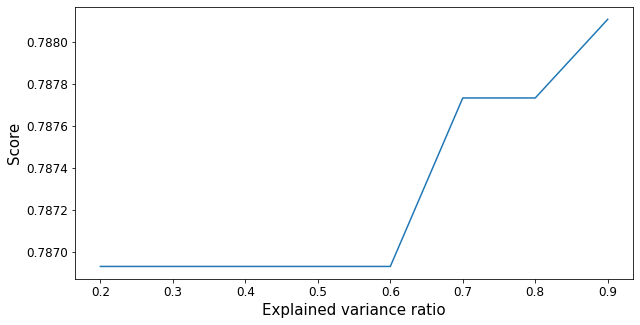

In [ ]:
score=[]
for r in range(2,10):

    pca = PCA(n_components= (r/10))
    X_reduced = pca.fit_transform(X_train)
    X_reduced_test = pca.transform(X_test)

    random_forest_clf = RandomForestClassifier(n_estimators=(HP[1]), random_state=42)
    random_forest_clf.fit(X_reduced, y_train)
    score.append(random_forest_clf.score(X_reduced_test, y_test))

    r=[]
for i in range(2,10):
    r.append(i/10)

plt.figure(figsize=(10,5))
plt.plot(r,score)
plt.xlabel("Explained variance ratio", fontsize=15)
plt.ylabel("Score", fontsize=15)

plt.show()

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

4

In [ ]:
pca.explained_variance_ratio_

array([0.63344469, 0.21667022, 0.07900124, 0.04513643, 0.02574742])

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [ ]:
print(X_reduced.shape,X_train.shape)

(74736, 4) (74736, 5)


### - Decision Trees with PCA

#### -- Building a Preliminary Classification Tree

In [ ]:
## create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_reduced, y_train)

In [ ]:
from sklearn import tree

treeObj = clf_dt.tree_
print(treeObj.node_count)

5393


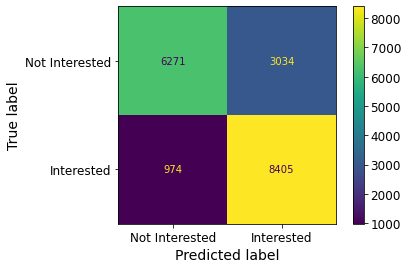

In [ ]:
plot_confusion_matrix(clf_dt, X_reduced_test, y_test, display_labels=["Not Interested","Interested"])

We see in the confusion matrix that 974 + 8405 = 9379 people that were Interested, **97.85%** were correctly classified and from the 6271 + 3034 = 9305 that were Not Interested, **67.39%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

#### -- Cost Complexity Pruning

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_reduced, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

len(ccp_alphas)

1803

In [ ]:
a=[]
for i in np.linspace(0,max(ccp_alphas),100):
  a.append(i)
a

[0.0,
 6.894765083724258e-05,
 0.00013789530167448516,
 0.00020684295251172775,
 0.0002757906033489703,
 0.0003447382541862129,
 0.0004136859050234555,
 0.00048263355586069807,
 0.0005515812066979407,
 0.0006205288575351832,
 0.0006894765083724258,
 0.0007584241592096684,
 0.000827371810046911,
 0.0008963194608841536,
 0.0009652671117213961,
 0.0010342147625586387,
 0.0011031624133958813,
 0.0011721100642331239,
 0.0012410577150703665,
 0.001310005365907609,
 0.0013789530167448516,
 0.0014479006675820942,
 0.0015168483184193368,
 0.0015857959692565794,
 0.001654743620093822,
 0.0017236912709310645,
 0.0017926389217683071,
 0.0018615865726055497,
 0.0019305342234427923,
 0.0019994818742800347,
 0.0020684295251172775,
 0.0021373771759545203,
 0.0022063248267917626,
 0.002275272477629005,
 0.0023442201284662478,
 0.0024131677793034906,
 0.002482115430140733,
 0.0025510630809779753,
 0.002620010731815218,
 0.002688958382652461,
 0.0027579060334897033,
 0.0028268536843269456,
 0.00289580133

In [ ]:
clf_dts = [] # create an array that we will put decision trees into

## now we create one decision tree per value for alpha and store it in the array
for ccp_alpha in a:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_reduced, y_train)
    clf_dts.append(clf_dt)

<function matplotlib.pyplot.show(close=None, block=None)>

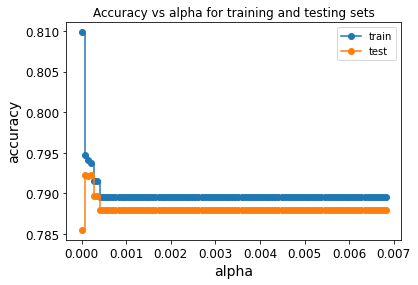

In [ ]:
train_scores = [clf_dt.score(X_reduced, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_reduced_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(a, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show

In [ ]:
Best_index = test_scores.index(max(test_scores))
Best_scores.append(["Decision trees with PCA", test_scores[Best_index]*100])
HP.append(a[Best_index])
print("The Decision trees model with PCA with the best accuracy (Accuracy = ", test_scores[Best_index],") with a = ",a[Best_index],"as hyperparameter")

The Decision trees model with PCA with the best accuracy (Accuracy =  0.7922821665596232 ) with a =  6.894765083724258e-05 as hyperparameter


### - Random Forest Classifier with PCA

In [ ]:
score = []

for n in range(10):
    random_forest_clf = RandomForestClassifier(n_estimators=(n*50+1), random_state=42)
    random_forest_clf.fit(X_reduced, y_train)
    score.append(random_forest_clf.score(X_reduced_test, y_test))

In [ ]:
n=[]
for i in range(len(score)):
    n.append(i*50+1)
Best_index = score.index(max(score))
Best_scores.append(["Random Forest with PCA",score[Best_index]*100])
HP.append(n[Best_index])
print("The Random Forest model with PCA with the best accuracy (Accuracy = ", score[Best_index],") with n = ",n[Best_index],"as number of estimators")

The Random Forest model with PCA with the best accuracy (Accuracy =  0.7885356454720617 ) with n =  151 as number of estimators


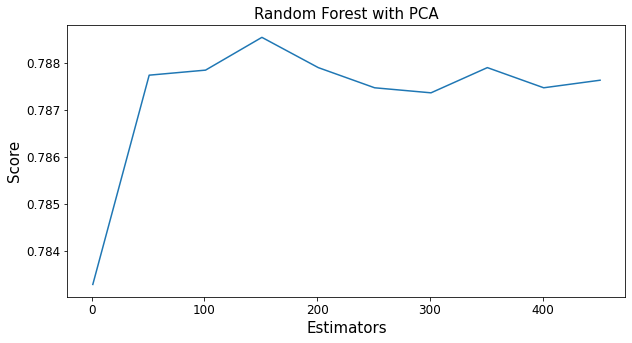

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n,score)
plt.title("Random Forest with PCA", fontsize=15)
plt.xlabel("Estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

### - Extra Trees with PCA

In [ ]:
score = []

for n in range(10):
    extra_trees_clf = ExtraTreesClassifier(n_estimators=(n*50+1), random_state=42)
    extra_trees_clf.fit(X_reduced, y_train)
    score.append(extra_trees_clf.score(X_reduced_test, y_test))

In [ ]:
n=[]
for i in range(len(score)):
    n.append(i*50+1)
Best_index = score.index(max(score))
Best_scores.append(["Extra Trees with PCA",score[Best_index]*100])
HP.append(n[Best_index])
print("The Extra Trees model with PCA with the best accuracy (Accuracy = ", score[Best_index],") with n = ",n[Best_index],"as number of estimators")

The Extra Trees model with PCA with the best accuracy (Accuracy =  0.7861271676300579 ) with n =  51 as number of estimators


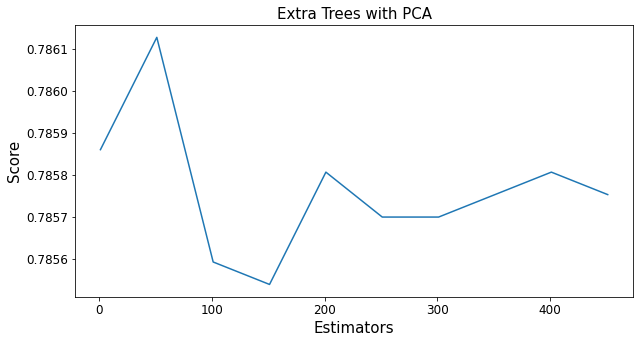

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n,score)
plt.title("Extra Trees with PCA", fontsize=15)
plt.xlabel("Estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

### - SVM with PCA

In [ ]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_reduced, y_train)
svm_clf.score(X_reduced_test,y_test)
Best_scores.append(["SVM Classifier with PCA",svm_clf.score(X_reduced_test,y_test)*100])

### - Logistic Regression with PCA

Simple Logistic Regression accuracy:  78.33440376792979 %


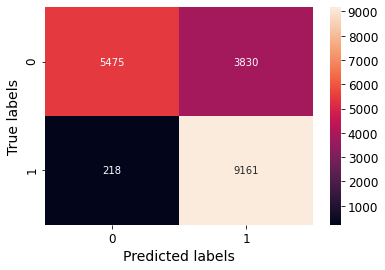

In [ ]:
log_reg = LogisticRegression( random_state=42)
log_reg.fit(X_reduced, y_train)
logpreds = log_reg.predict(X_reduced_test)
print('Simple Logistic Regression accuracy: ', accuracy_score(y_test, logpreds)*100,'%')
Best_scores.append(["Logistic Regression with PCA",accuracy_score(y_test, logpreds)*100])

plot_confusionmatrix(y_test, logpreds)

We see in the confusion matrix that 218 + 9161 = 9379 people that were Interested, **97.68%** were correctly classified and from the 5475 + 3830 = 9305 that were Not Interested, **58.84%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

### - Regressions with PCA

#### -- Ridge and Lasso

In [ ]:
def regression(model_class, polynomial, alphas, **model_kargs):
        model = model_class(alphas, **model_kargs) if alphas > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X_reduced, y_train)
        regul = model.predict(X_reduced_test)
        lw = 2 if alphas > 0 else 1
        return regul.round()

#### --- Ridge with PCA

Ridge Regression with PCA accuracy:  78.33440376792979 %


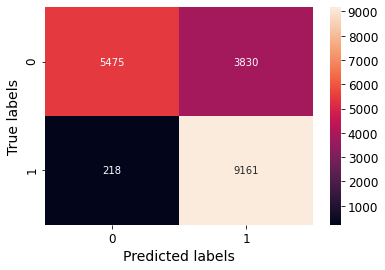

In [ ]:
rin_reg = regression(Ridge, polynomial = False, alphas = 1 , random_state = 42)
print('Ridge Regression with PCA accuracy: ', (accuracy_score(y_test, rin_reg, normalize=False)/len(y_test))*100,"%")
Best_scores.append(["Ridge Regression with PCA",(accuracy_score(y_test, rin_reg, normalize=False)/len(y_test))*100])

plot_confusionmatrix(y_test, rin_reg)

#### --- Lasso with PCA

Lasso Regression accuracy:  78.33440376792979 %


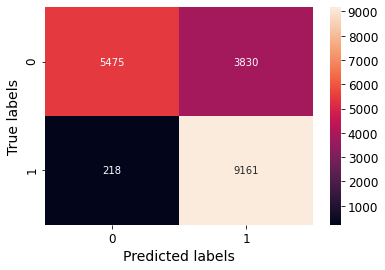

In [ ]:
Lasso_reg = regression(Lasso, polynomial = False, alphas = 0.1 , random_state = 42)
print('Lasso Regression accuracy: ', (accuracy_score(y_test, Lasso_reg, normalize=False)/len(y_test))*100,"%")
Best_scores.append(["Lasso Regression with PCA",(accuracy_score(y_test, Lasso_reg, normalize=False)/len(y_test))*100])

plot_confusionmatrix(y_test, Lasso_reg)

We see in the confusion matrix that 218 + 9161 = 9379 people that were Interested, **97.68%** were correctly classified and from the 5475 + 3830 = 9305 that were Not Interested, **58.84%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

PCA did not improve anything, if anything it made the accuracies worse.

<hr style='height:1px'>

## Score

In [ ]:
Best_scores

[['Decision trees', 79.26032969385571],
 ['Random Forest', 78.96060800685079],
 ['Extra Trees', 78.72511239563262],
 ['SVM Classifier', 78.33440376792979],
 ['Logistic Regression', 78.32369942196532],
 ['Ridge Regression', 78.33440376792979],
 ['Lasso Regression', 76.93213444658531],
 ['Voting with all Classifiers', 79.00342539070863],
 ['Voting without Random Forest Classifier', 78.86426889317063],
 ['Voting without Decision Trees Classifier', 78.72511239563262],
 ['Voting without Extra Trees Classifier', 79.12117319631771],
 ['Decision trees with PCA', 79.22821665596233],
 ['Random Forest with PCA', 78.85356454720616],
 ['Extra Trees with PCA', 78.61271676300578],
 ['SVM Classifier with PCA', 78.33440376792979],
 ['Logistic Regression with PCA', 78.33440376792979],
 ['Ridge Regression with PCA', 78.33440376792979],
 ['Lasso Regression with PCA', 78.33440376792979]]

<hr style='height:1px'>

## Final Tunning for Decision Trees

Since Decision Trees is the best model, we will try to improve a little bit more it's accuracy with some final tunning.

We want to find the absolute best ccp_alpha for this tree. Because there are many ccp_alphas in this decision tree, we will try out 50 of them that are between 0 and 0.001 because there's the area where the best ccp_alpha is.

In [ ]:
a1=[]
for i in np.linspace(0, 0.001, 50):
  a1.append(i)

In [ ]:
clf_dts = [] # create an array that we will put decision trees into

## now we create one decision tree per value for alpha and store it in the array
for ccp_alpha in a1:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

<function matplotlib.pyplot.show(close=None, block=None)>

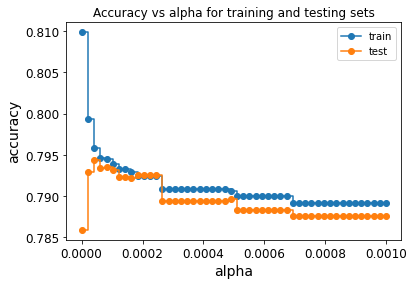

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a1, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(a1, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show

We will repeat the process for alphas between 0 and 0.0001

In [ ]:
a1=[]
for i in np.linspace(0, 0.0001, 50):
  a1.append(i)

In [ ]:
clf_dts = [] # create an array that we will put decision trees into

## now we create one decision tree per value for alpha and store it in the array
for ccp_alpha in a1:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

<function matplotlib.pyplot.show(close=None, block=None)>

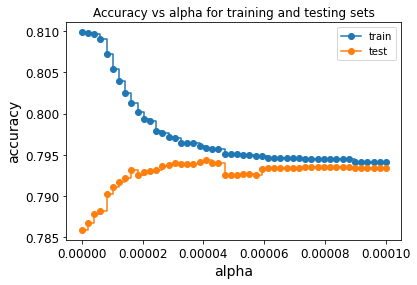

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a1, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(a1, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show

We can say that the accuracy of ccp_alpha=0.00004 is enough for our project.

#### Cross Validation For Finding the Best Alpha

<AxesSubplot:xlabel='tree'>

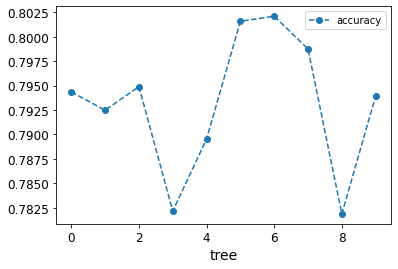

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.00004) # create the tree with ccp_alpha = 0.0001002905964273828

## now we are going to use 10-fold cross validation to create 10 different training and testing datasets
## that are then used to train and test the tree.

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
data = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

data.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In the graph we see that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. We are going to use cross validation to find the optimal alpha.

In [ ]:
## create an array to store the results of each fold during cross validation
alpha_loop_values=[]

## For each candidate value for alpha, we will run 10-fold cross validation.
##Then we will store the mean and standard deviation of the scores ( the accuracy ) for each call
for ccp_alpha in a:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

<AxesSubplot:xlabel='alpha'>

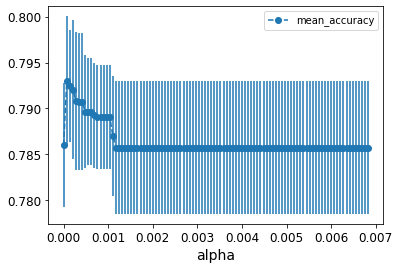

In [ ]:
## Now we can draw a graph of the mean and standard deviation of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [ ]:
a1=[]
for i in np.linspace(0, 0.0001, 50):
  a1.append(i)

In [ ]:
## create an array to store the results of each fold during cross validation
alpha_loop_values=[]

## For each candidate value for alpha, we will run 10-fold cross validation.
##Then we will store the mean and standard deviation of the scores ( the accuracy ) for each call
for ccp_alpha in a1:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

<AxesSubplot:xlabel='alpha'>

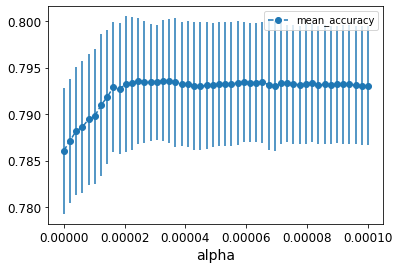

In [ ]:
## Now we can draw a graph of the mean and standard deviation of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

We can see that ccp_alpha=0.00003 is accurate enough for our needs.

In [ ]:
## Now we have to build and train a new decision tree, only using the optimal alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.00003)

clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

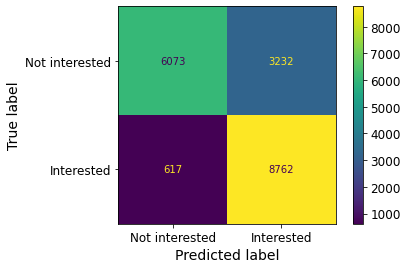

In [ ]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Not interested", "Interested"])

We see in the confusion matrix that 617 + 8762= 9379 people that were Interested, **93.42%** were correctly classified and from the 6125 + 3180 = 9305 that were Not Interested, **64.75%** were correclty classified. The Classification Tree may have overfit the training dataset. So we need to prune the tree.

In [ ]:
## the final accuracy score of the decision tree
clf_dt_pruned.score(X_test, y_test)*100

79.3994861913937

We can see that we managed to improve our accuracy from 79.26% to **79.40%**. That's the best we can do with this dataset.

<hr style='height:1px'>

# Beep

In [ ]:
from IPython.lib.display import Audio
import numpy as np

framerate = 4410
play_time_seconds = 1


t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)
Audio(audio_data, rate=framerate, autoplay=True)

In [ ]:
print(time.time()-ttt)

538.9321928024292


<hr style='height:1px'>